# Salary Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [8]:
df.shape

(397, 6)

In [9]:
df.nunique()

rank               3
discipline         2
yrs.since.phd     53
yrs.service       52
sex                2
salary           371
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [11]:
df['salary'].unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [13]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [15]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


In [16]:
salary1=df.drop(['rank','discipline'],axis=1)

In [17]:
salary1.head(5)

,yrs.since.phd,yrs.service,sex,salary
0,19,18,1.0,139750
1,20,16,1.0,173200
2,4,3,1.0,79750
3,45,39,1.0,115000
4,40,41,1.0,141500


<AxesSubplot:>

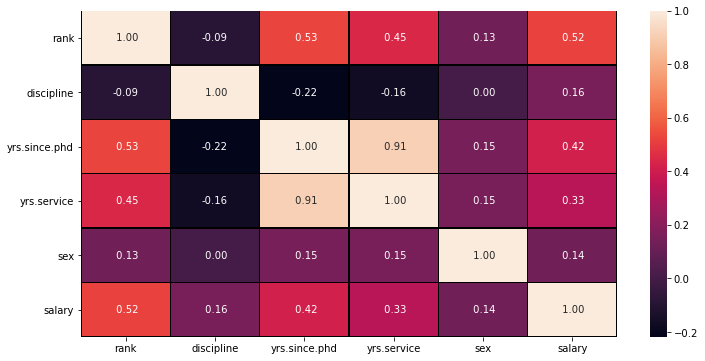

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor="black",fmt=' .2f')

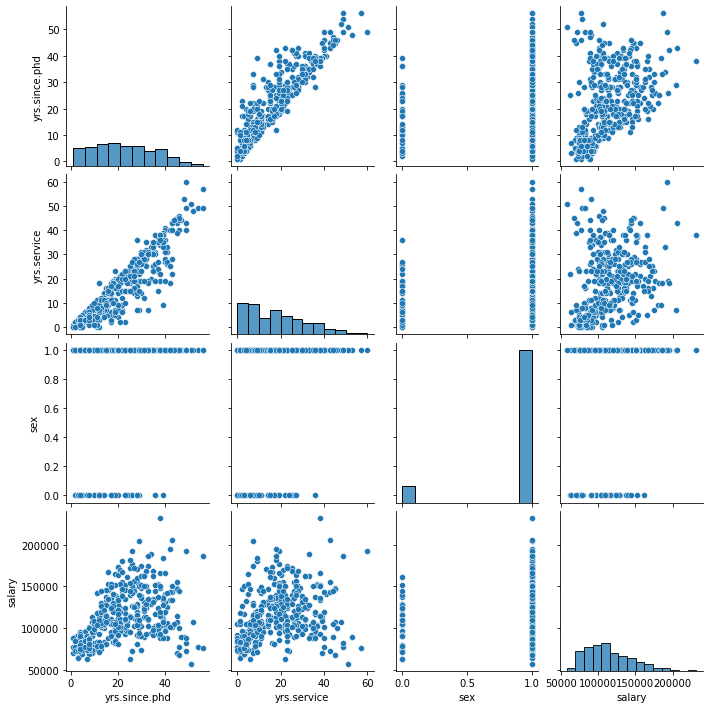

In [19]:
sns.pairplot(salary1)

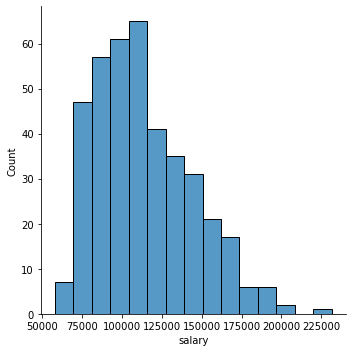

In [20]:
sns.displot(df['salary'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='yrs.service'>

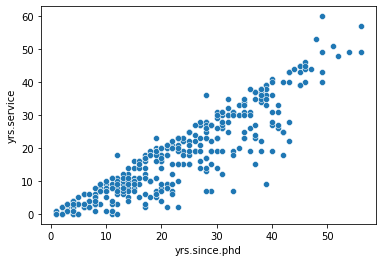

In [21]:
sns.scatterplot(x="yrs.since.phd",y="yrs.service",data=df)

<AxesSubplot:xlabel='salary', ylabel='yrs.since.phd'>

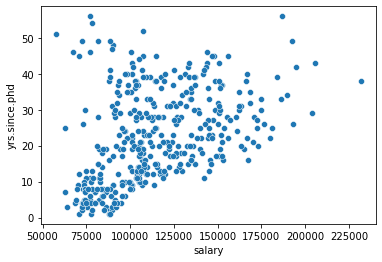

In [21]:
sns.scatterplot(y="yrs.since.phd",x="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

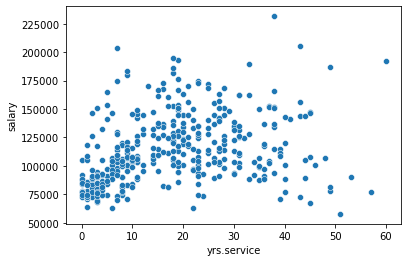

In [22]:
sns.scatterplot(x="yrs.service",y="salary",data=df)

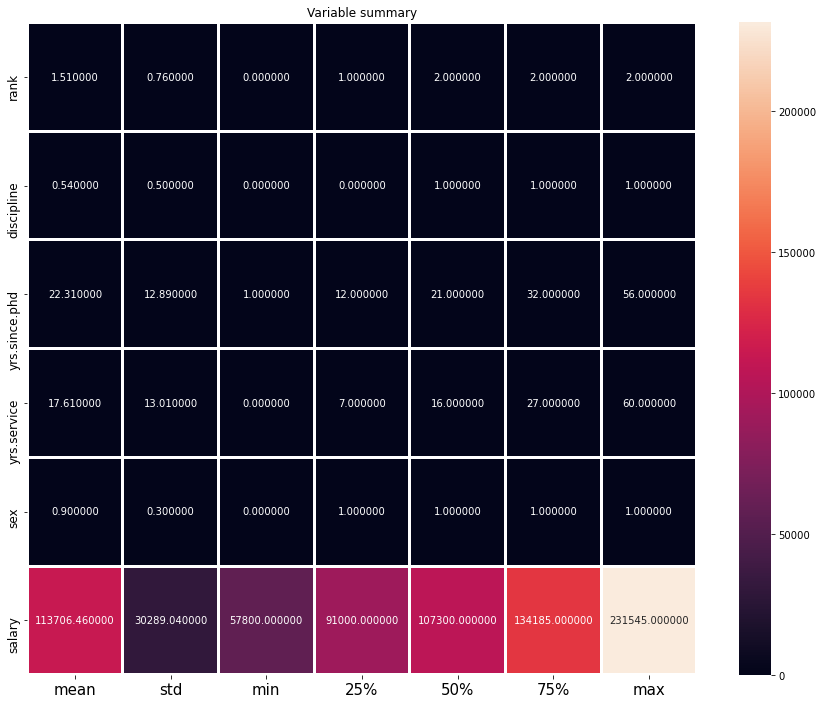

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.title("Variable summary")
plt.show()

In [23]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [29]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

C:\Users\Sneha\annaconda\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [31]:
df=df.drop(["rank","sex"],axis=1)
df

,discipline,yrs.since.phd,yrs.service,salary
0,1.0,19,18,139750
1,1.0,20,16,173200
2,1.0,4,3,79750
3,1.0,45,39,115000
4,1.0,40,41,141500
...,...,...,...,...
392,0.0,33,30,103106
393,0.0,31,19,150564
394,0.0,42,25,101738
395,0.0,25,15,95329


In [107]:
df.columns

Index(['discipline', 'yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

In [32]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 4)

In [33]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([3, 2, 2, 3], dtype=int64))


In [34]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,discipline,yrs.since.phd,yrs.service,salary
0,1.0,19,18,139750
1,1.0,20,16,173200
2,1.0,4,3,79750
3,1.0,45,39,115000
4,1.0,40,41,141500
...,...,...,...,...
392,0.0,33,30,103106
393,0.0,31,19,150564
394,0.0,42,25,101738
395,0.0,25,15,95329


In [35]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(397, 4)
(393, 4)


In [36]:
loss_percent=((397-393)/397)*100
print(loss_percent)

1.0075566750629723


In [28]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [34]:
features=df.drop("salary",axis=1)
target=df["salary"]

In [114]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
for i in range(0,1000):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training academy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the training academy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training academy is:-0.3611999954853077
At random state 0, the training academy is:-0.4079258314975236


At random state 1, the training academy is:-0.3604245854198438
At random state 1, the training academy is:-0.41633641876629457


At random state 2, the training academy is:-0.37547390964955596
At random state 2, the training academy is:-0.3600189554526694


At random state 3, the training academy is:-0.3847313825130595
At random state 3, the training academy is:-0.3293529875010861


At random state 4, the training academy is:-0.38517450334380465
At random state 4, the training academy is:-0.304400813331562


At random state 5, the training academy is:-0.3950033630150771
At random state 5, the training academy is:-0.2752907752774737


At random state 6, the training academy is:-0.3650308031752799
At random state 6, the training academy is:-0.40189870806075667


At random state 7, the training academy is:-0.3575963886324032
At random state 7, the training academ

In [117]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=32)


In [118]:
lr.fit(features_train,target_train)

LinearRegression()

In [119]:
pred_test=lr.predict(features_test)

In [120]:
print(r2_score(target_test,pred_test))

0.3671499580137658


In [121]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.3270801167406512 and accuracy score for training is -0.2505050820589807and accuracy for the testing is 0.3671499580137658


At cross fold3 the cv score is 0.3203328673059879 and accuracy score for training is -0.2505050820589807and accuracy for the testing is 0.3671499580137658


At cross fold4 the cv score is 0.3218196693768362 and accuracy score for training is -0.2505050820589807and accuracy for the testing is 0.3671499580137658


At cross fold5 the cv score is 0.29569928663871775 and accuracy score for training is -0.2505050820589807and accuracy for the testing is 0.3671499580137658


At cross fold6 the cv score is 0.33096341839295546 and accuracy score for training is -0.2505050820589807and accuracy for the testing is 0.3671499580137658


At cross fold7 the cv score is 0.3257704419996536 and accuracy score for training is -0.2505050820589807and accuracy for the testing is 0.3671499580137658


At cross fold8 the cv score is 0.3310060584513582 and ac

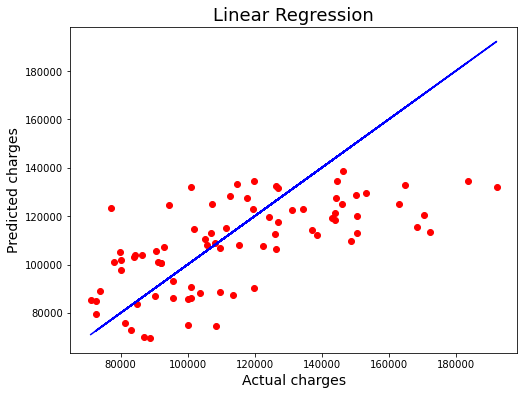

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [124]:
from sklearn.linear_model import Lasso
parameters={'alpha': [.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [130]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.36733832066397754

In [137]:
cv_score=cross_val_score(ls,features,target,cv=8)
cv_mean=cv_score.mean()
cv_mean

0.33102864358290257

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [139]:
rf=RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,features,target,cv=8)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 36.67885463450603
Cross Val Score: 37.27716394091164


In [140]:
import pickle
filename='salary.pkl'
pickle.dump(rf,open(filename,'wb'))
